In [2]:
import pandas as pd
df=pd.read_csv("cleaned_sales_data.csv")
df['Order.Date']=pd.to_datetime(df['Order.Date'])
print(df.info())# check for datatypes
print(df.isna().sum())#check for missing values
print(df.duplicated().sum())#check for


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        51290 non-null  object        
 1   City            51290 non-null  object        
 2   Country         51290 non-null  object        
 3   Customer.ID     51290 non-null  object        
 4   Customer.Name   51290 non-null  object        
 5   Discount        51290 non-null  float64       
 6   Market          51290 non-null  object        
 7   Order.Date      51290 non-null  datetime64[ns]
 8   Order.ID        51290 non-null  object        
 9   Order.Priority  51290 non-null  object        
 10  Product.ID      51290 non-null  object        
 11  Product.Name    51290 non-null  object        
 12  Profit          51290 non-null  float64       
 13  Quantity        51290 non-null  int64         
 14  Region          51290 non-null  object        
 15  Ro

In [ ]:
"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
df['year']=df['Order.Date'].dt.year
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum,year
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,2025-02-17,CA-2011-130813,High,...,Consumer,2025-02-17,Second Class,4.37,California,Paper,2011,North America,2,2025
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,2025-02-17,CA-2011-148614,Medium,...,Consumer,2025-02-17,Standard Class,0.94,California,Paper,2011,North America,4,2025
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2025-02-17,CA-2011-118962,Medium,...,Consumer,2025-02-17,Standard Class,1.81,California,Paper,2011,North America,32,2025
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2025-02-17,CA-2011-118962,Medium,...,Consumer,2025-02-17,Standard Class,4.59,California,Paper,2011,North America,32,2025
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,2025-02-17,CA-2011-146969,High,...,Consumer,2025-02-17,Standard Class,1.32,California,Paper,2011,North America,40,2025


In [4]:
pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Sanjana D\AppData\Local\Temp\ipykernel_7520\4220158209.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales.head(20),x='Product.Name',y='Sales',palette='viridis')


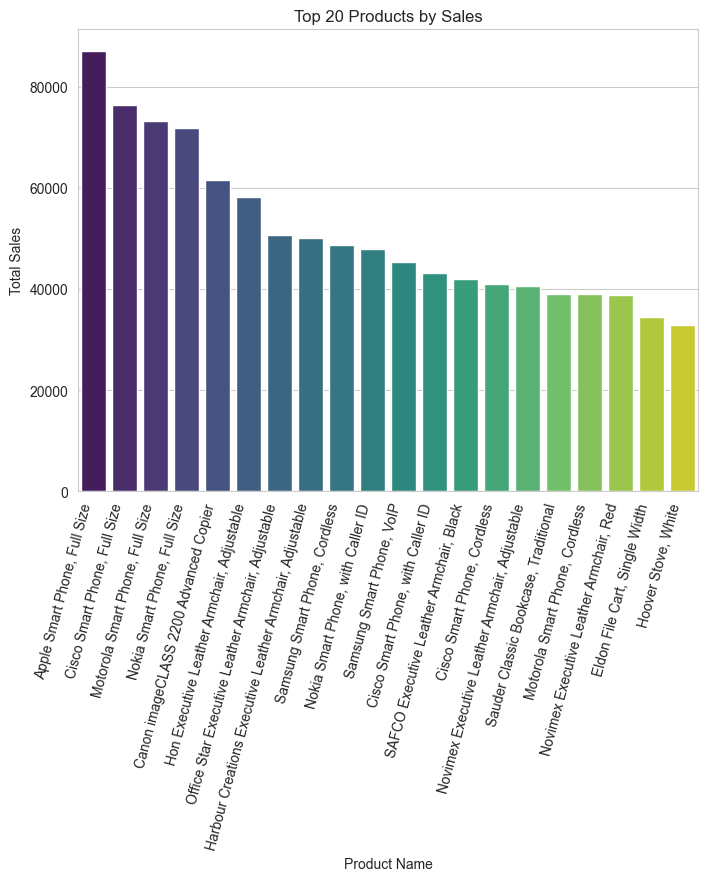

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
# sales distribution
product_sales=df.groupby('Product.Name')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(data=product_sales.head(20),x='Product.Name',y='Sales',palette='viridis')
plt.xticks(rotation=75,ha='right')
plt.title('Top 20 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.show()

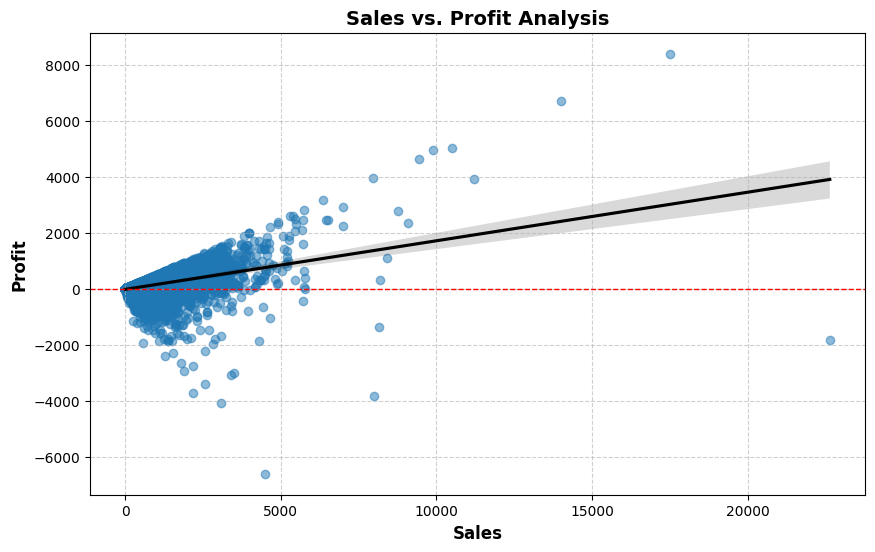

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  

# Scatter plot with regression line
sns.regplot(data=df, x='Sales', y='Profit', scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'})

# Highlight zero-profit line
plt.axhline(y=0, color='red', linestyle='dashed', linewidth=1)

plt.xlabel("Sales", fontsize=12, fontweight="bold")
plt.ylabel("Profit", fontsize=12, fontweight="bold")
plt.title("Sales vs. Profit Analysis", fontsize=14, fontweight="bold")

plt.grid(True, linestyle='--', alpha=0.6)  
plt.show()

C:\Users\Sanjana D\AppData\Local\Temp\ipykernel_7520\3780239759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales,x='Region',y='Sales',palette='coolwarm')


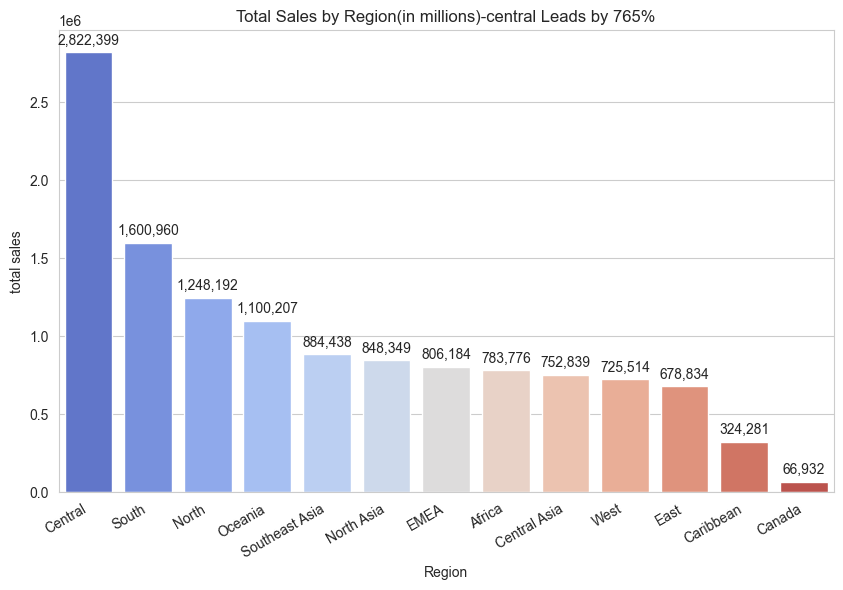

In [ ]:
region_sales=df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=region_sales,x='Region',y='Sales',palette='coolwarm')
plt.xticks(rotation=30,ha='right')
plt.title('Total Sales by Region(in millions)-central Leads by 76%')
plt.xlabel('Region')
plt.ylabel('total sales')


for index, value in enumerate(region_sales['Sales']):
    plt.text(index,value+50000,f'{int(value):,}',ha='center',fontsize=10)
plt.show()


<Figure size 1200x600 with 0 Axes>

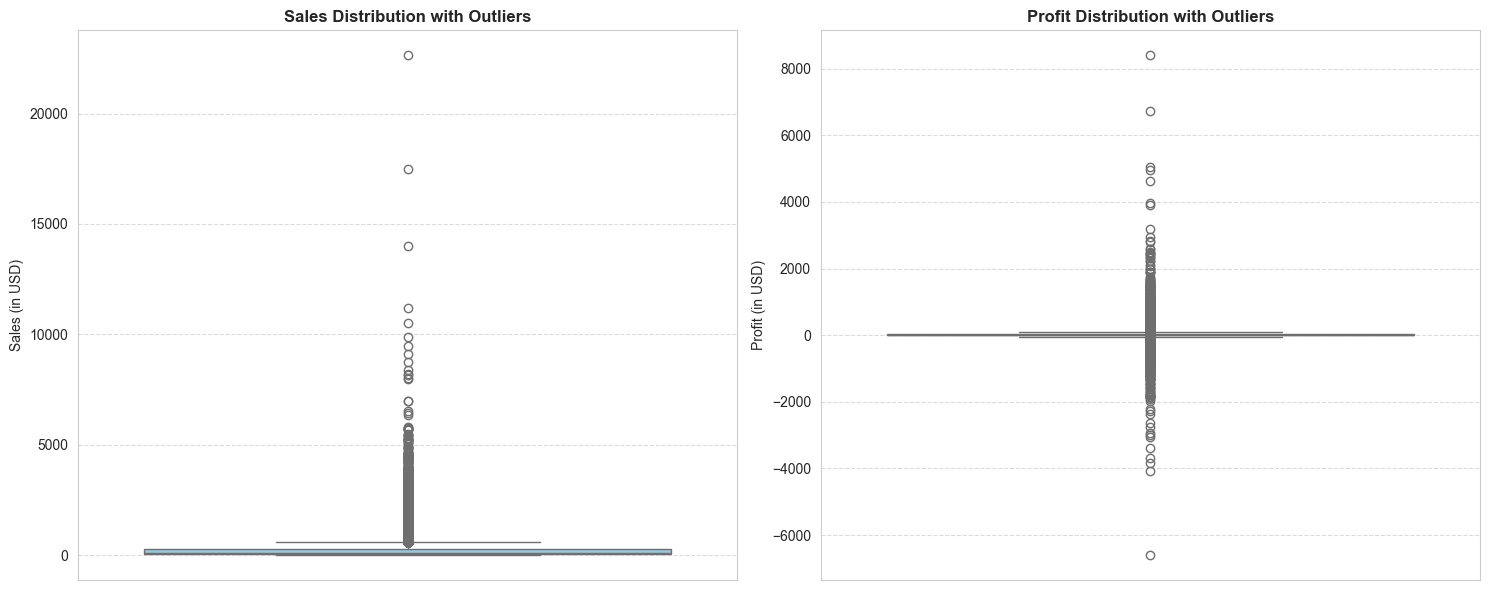

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Sales Distribution Box Plot
sns.boxplot(y=df['Sales'], ax=axes[0], color='skyblue', showfliers=True)
axes[0].set_title("Sales Distribution with Outliers", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Sales (in USD)")
axes[0].set_xlabel("")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Profit Distribution Box Plot
sns.boxplot(y=df['Profit'], ax=axes[1], color='lightcoral', showfliers=True)
axes[1].set_title("Profit Distribution with Outliers", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Profit (in USD)")
axes[1].set_xlabel("")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

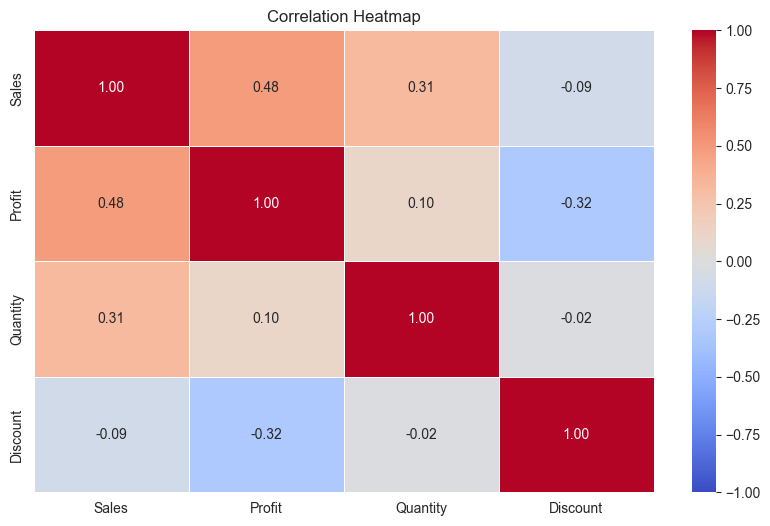

In [14]:
# Correlation matrix for numerical columns
corr_matrix = df[['Sales', 'Profit', 'Quantity', 'Discount']].corr()

# Heatmap for correlations
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidths=0.5,vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Sanjana D\AppData\Local\Temp\ipykernel_7520\1830101368.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales_df, x="Category", y="Sales", palette="Blues_d")


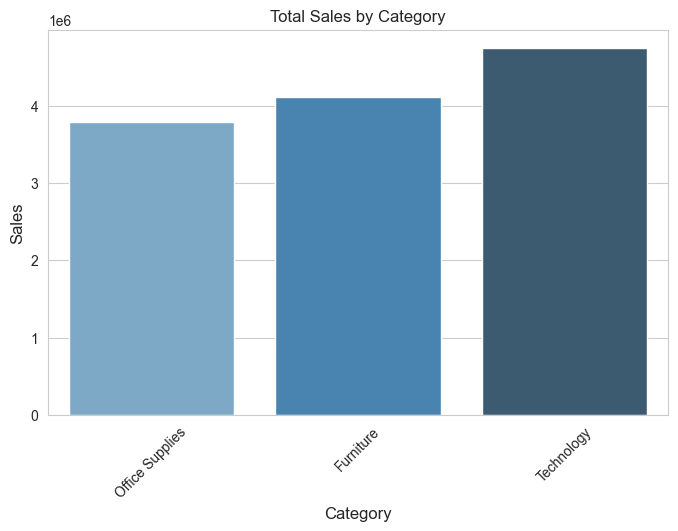

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
category_sales_df = category_sales.reset_index()
category_sales_df.columns = ["Category", "Sales"]

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=category_sales_df, x="Category", y="Sales", palette="Blues_d")
plt.title("Total Sales by Category", fontsize=12)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation=45)  
plt.show()